In [50]:
%run "../common.ipynb"

## Logistic regression

**Logistic regression ** is used for classification problems. The term regressions seems to indicate otherwise. However here, the model predicts a number between 0 and 1 and a threshhold is used to compare the result to predict one or other depending upon if it is greater or lesser than the threshhold. A threshold $T$ (usually 0.5) which indicates if it the predicted number is less than threshhold $T$ then we predict one otherwise other class.

Here we are restricting for two classes - however, later we show how it can be extended to show multiple classes.

In linear regression we had the hypothesis function $h = \theta^T x$

In Logistic regression, the form of the hypothesis takes the form:

$h(x) = g(\theta^T x)$ where $g(\theta^T x) = \frac{1}{1+e^{-z}}$ and $z = \theta^T x$ 

The function $g$ is called Logistic function or Sigmoid function. 
Both Logistic or Sigmoid can be used interchangeably.

In summary, the complete hypothesis function is:
$$h_\theta(x) = g(\theta^T x) = \frac{1}{1+e^{-\theta^{T} x}}$$. Sigmoid function looks like:
<img src="imgs/sigmoid.png",width=200,height=200>

when $z$ is +ve the term $e^{-z} < 1$, therefore, $\frac{1}{1+e^{-z}}$ is $\frac{1}{<2} > .5$; and when $z$ is -ve the denominator is $>2$ and thus $g$ will be $<.5$

$\begin{equation}
  g=\left\{
  \begin{array}{@{}ll@{}}
    \frac{1}{1+e^0} = 0.5, & \text{if}\ z=0 \\
    > .5 ,                 & \text{z < 1} \\
    < 0.5,                 & \text{z > 1} 
  \end{array}\right.
\end{equation} 
$

In Linear regressions we had the cost function $$Cost = J(\theta) = \frac{1}{2m}\sum_{1}^{m}(h_{\theta}(x) - y)^2$$
We need to modify this because $(h_\theta(x)-y)^2$ is non-convex function.

Therefore, we want a convex function so that we can gradient decent converge to global minimum.

We define the cost function as:

$\begin{equation}
  Cost(h_\theta(x),y)=\left\{
  \begin{array}{@{}ll@{}}
    -\log(h_\theta(x)),    & \text{if  } y = 1 \\
    -\log(1- h_\theta(x)) & \text{if  } y = 0
  \end{array}\right.
\end{equation} 
$



Intuitively Sigmoid function $h_\theta(x)$ outputs a value between $0$ and $1$.

if $y$ is 1, we want $h(x)$ to be close to $1$ such that cost $\log(1) = 0$. (If not $h(x) = 0 =>$ $cost = log(0) = \infty$.

if $y$ is 0, we want $h(x)$ to be close to $0$. If it is $1$, the $cost$ is super high close to $\infty$;

If we plot th cost function, it is what we see.


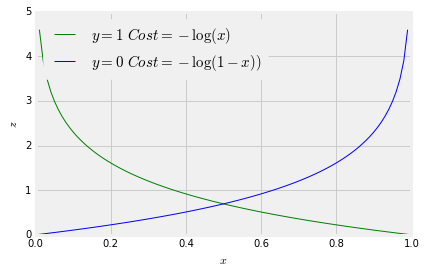

In [79]:
#graphFunction('1/(1+np.exp(-x))', -1,1, "r", "$x$", "$z$", "Logistic Function",'.',"$z=\\frac{1}{1+e^{-\\theta^{T} x}}$")
#graphFunction('-np.log(1/(1+np.exp(-x)))', 0,1, "g", "", "", "",'.',"$Cost y=1$")
graphFunction('-np.log(x)'    , 0,1, "g", "$x$", "$z$", "", '', "$y = 1\\  Cost = -\\log(x)$") #, 'o', "sada")
graphFunction('-np.log(1-x)', 0,1, "b", "$x$", "$z$", '', '', "$y = 0 \\ Cost = -\\log(1-x))$") #, 'o', "sada")


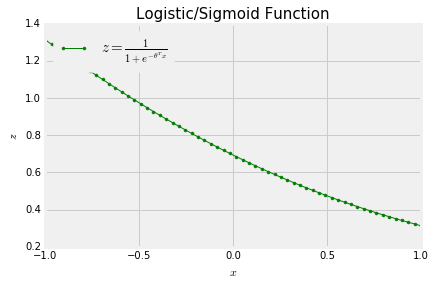

Evaluating np.log(x) [-1.   -0.84 -0.68 -0.53 -0.37 -0.21 -0.05  0.11  0.26  0.42  0.58  0.74  0.89  1.05  1.21  1.37  1.53  1.68  1.84  2.  ] [  nan   nan   nan   nan   nan   nan   nan -2.25 -1.34 -0.86 -0.55 -0.31 -0.11  0.05  0.19  0.31  0.42  0.52  0.61  0.69]
Evaluating -np.log(x) [-1.   -0.84 -0.68 -0.53 -0.37 -0.21 -0.05  0.11  0.26  0.42  0.58  0.74  0.89  1.05  1.21  1.37  1.53  1.68  1.84  2.  ] [  nan   nan   nan   nan   nan   nan   nan  2.25  1.34  0.86  0.55  0.31  0.11 -0.05 -0.19 -0.31 -0.42 -0.52 -0.61 -0.69]


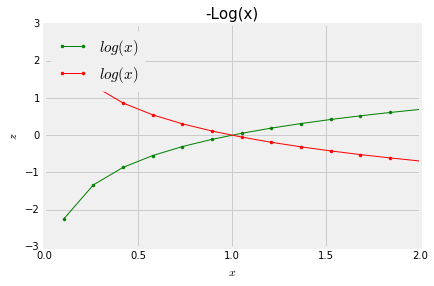

In [49]:
graphFunction('np.log(x)', 0, 1, "g", "$x$", "$z$", "Log(x)",'.',"$log(x)$") #, 'o', "sada")
graphFunction('-np.log(x)', 0,1, "r", "$x$", "$z$", "-Log(x)",'.',"$log(x)$") #, 'o', "sada")


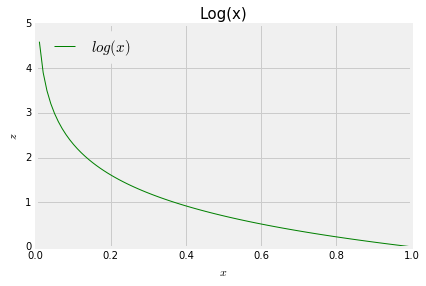

In [57]:
def graphFunction(formula, xmin, xmax, c=None, xlabel= None, ylabel=None, title=None, marker=None,
                  label=None, legend=True, legendLoc=2):
    x = np.linspace(xmin, xmax, 100)
    if ( callable(formula)):
        y = np.apply_along_axis(formula, 0, x)
        #print ("Evaluating Function", str(formula), y)
    elif (type(formula) == str):
        y = eval(formula)
        #print ("Evaluating", formula, x, y)
    else:
        y = formula

    #return
    label = label if label else str(formula);
    plt.plot(x, y, c=c, marker=marker, label=label, linewidth=1)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title (title, fontsize = 15)
    fs = 20 if (label.find("$") > 0) else 15
    plt.legend(fontsize=15, loc=legendLoc) if ( legend) else None;

graphFunction('-np.log(x)', 0,1, "g", "$x$", "$z$", "Log(x)",'',"$log(x)$") #, 'o', "sada")


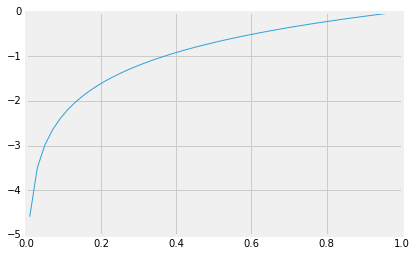

In [48]:
x= np.linspace(-1, 1, 100)
y= np.log(x)
#y[0] = -8
#print (x,y)
plt.plot(x, y)
#plt.axis((0,1,25,250))

